# electricity and weather data

This script provides multiple patterns to load electricity data (via web scraping) and weather data (via api) as well as analyzing this data with simple statistic techniques

core questions:
* exploring weather dependency of own (single consumer) data gathered from wiener netze
* exploring effects of a warm winter on electricity demand
* exploring eco-friendlyness of lower austrian electricity mix and ways to predict it for consumers

In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 

# getting the load data from raw data file
(!) Not needed anymore - This has been replaced by directly storing the object in a JSON 

In [3]:
r = open('data/load_1509_0811.txt', 'r')

soup2 = BeautifulSoup(r, 'html5lib')

table = soup2.findAll('div', attrs = {'class':'cc'})

len(table)


4014

In [377]:
loads=[]  # a list to store quotes

for row in soup2.findAll('div', attrs = {'class':'cc'}):
    load = {}
    load['timestamp']=row.findAll('span')[0].text
    load['hydro']=float(row.findAll('span')[1].text)
    load['biomass']=float(row.findAll('span')[2].text)
    load['wind']=float(row.findAll('span')[3].text)
    load['pv']=float(row.findAll('span')[4].text)
    load['load']=float(row.findAll('span')[5].text)
    load['timestamp2']=row.findAll('span')[6].text
    
    loads.append(load)
    
len(loads)

4014

In [378]:
loads[len(loads)-1]

{'timestamp': '1670491800',
 'hydro': 571.0,
 'biomass': 94.4,
 'wind': 328.18,
 'pv': 95.0646,
 'load': 1510.2,
 'timestamp2': '08.12.2022 10:30'}

In [379]:
df  = pd.DataFrame(loads) #only is needed for joining with old text file

# getting the load data from json directly to data frame

In [41]:

df = pd.read_json(r'data/loads.json',orient='split',convert_dates=False)

In [42]:
print(df)


      timestamp  hydro  biomass    wind       pv     load        timestamp2
0    1663264800    665  66.1558  456.28   0.0000  1417.80  15.09.2022 20:00
1    1663266600    665  66.1558  286.70   0.0000  1371.00  15.09.2022 20:30
2    1663268400    665  66.1558  222.04   0.0000  1314.55  15.09.2022 21:00
3    1663270200    665  66.1558  145.18   0.0000  1260.52  15.09.2022 21:30
4    1663272000    665  66.1558  136.64   0.0000  1249.54  15.09.2022 22:00
..          ...    ...      ...     ...      ...      ...               ...
332  1673168400    665   0.0000  456.28  47.3277  1300.03  08.01.2023 10:00
333  1673170200    669   0.0000  436.76  62.3844  1319.08  08.01.2023 10:30
334  1673172000    669   0.0000  414.80  72.3261  1332.98  08.01.2023 11:00
335  1673173800    674   0.0000  509.96  80.6868  1333.59  08.01.2023 11:30
336  1673175600    674   0.0000  403.82  83.3652  1319.08  08.01.2023 12:00

[5847 rows x 7 columns]


In [43]:
df.biomass

0      66.1558
1      66.1558
2      66.1558
3      66.1558
4      66.1558
        ...   
332     0.0000
333     0.0000
334     0.0000
335     0.0000
336     0.0000
Name: biomass, Length: 5847, dtype: float64

# getting the newest load data from scraping the page

In [44]:
URL = "https://energiewetter.energiebewegung.at/index.php"
#view-source:https://energiewetter.energiebewegung.at/index.php

In [45]:
r = requests.get(URL)
## print(r.content)

soup = BeautifulSoup(r.content, 'html5lib')

#exploring the data
##table = soup.find('div', attrs = {'class':'cc'})
table = soup.find('div', attrs = {'id':'chart-js'})

len(table)


675

In [46]:
print('ALERT: BIOMASS IS CURRENTLY MISSING')

ALERT: BIOMASS IS CURRENTLY MISSING


In [47]:
loads_new=[]  # a list to store quotes

#type(table)
##table = soup.find('div', attrs = {'id':'chart-js'})


for row in table.findAll('div', attrs = {'class':'cc'}):
    load = {}
    load['timestamp']=row.findAll('span')[0].text
    load['hydro']=float(row.findAll('span')[1].text)
    load['biomass']= float(0) ##float(row.findAll('span')[2].text) ####ALERT: BIOMASS IS CURRENTLY MISSING
    load['wind']=float(row.findAll('span')[3].text)
    load['pv']=float(row.findAll('span')[4].text)
    load['load']=float(row.findAll('span')[5].text)
    load['timestamp2']=row.findAll('span')[6].text
    
    loads_new.append(load)
    
len(loads_new)

337

In [48]:
print(loads_new[0])
print(loads_new[len(loads_new)-1])

{'timestamp': '1672815600', 'hydro': 645.0, 'biomass': 0.0, 'wind': 46.36, 'pv': 0.0, 'load': 1533.93, 'timestamp2': '04.01.2023 08:00'}
{'timestamp': '1673420400', 'hydro': 661.0, 'biomass': 0.0, 'wind': 118.34, 'pv': 0.0, 'load': 1692.9, 'timestamp2': '11.01.2023 08:00'}


In [49]:

df1 = pd.DataFrame(loads_new) 
df1.dtypes


timestamp      object
hydro         float64
biomass       float64
wind          float64
pv            float64
load          float64
timestamp2     object
dtype: object

# Merge to one data frame, remove duplicates and save

In [50]:
df.dtypes

timestamp       int64
hydro           int64
biomass       float64
wind          float64
pv            float64
load          float64
timestamp2     object
dtype: object

In [51]:
df = pd.concat([df, df1]).drop_duplicates()
df['biomass']= pd.to_numeric(df['biomass'], errors='coerce')

#df['biomass']=df['biomass'].astype('float64')
#df.dtypes

In [52]:
df['biomass']

0      66.1558
1      66.1558
2      66.1558
3      66.1558
4      66.1558
        ...   
332     0.0000
333     0.0000
334     0.0000
335     0.0000
336     0.0000
Name: biomass, Length: 6184, dtype: float64

## saving the dataframe without calculations 

In [53]:
df.to_json(r'data/loads.json',orient='split')

# prepare for merger (calculations, format)

In [54]:
#df['biomass']=df['biomass'].fillna(0)
#df['biomass']=df['biomass'].astype(int)

df["balance_renew"]=-df["load"]+df["pv"]+df["wind"]+df["biomass"]+df["hydro"]

df['timestamp']=df['timestamp'].astype(int)

df.dtypes



timestamp          int64
hydro            float64
biomass          float64
wind             float64
pv               float64
load             float64
timestamp2        object
balance_renew    float64
dtype: object

In [80]:
print(df)

      timestamp  hydro  biomass    wind       pv     load        timestamp2  \
0    1663264800  665.0  66.1558  456.28   0.0000  1417.80  15.09.2022 20:00   
1    1663266600  665.0  66.1558  286.70   0.0000  1371.00  15.09.2022 20:30   
2    1663268400  665.0  66.1558  222.04   0.0000  1314.55  15.09.2022 21:00   
3    1663270200  665.0  66.1558  145.18   0.0000  1260.52  15.09.2022 21:30   
4    1663272000  665.0  66.1558  136.64   0.0000  1249.54  15.09.2022 22:00   
..          ...    ...      ...     ...      ...      ...               ...   
332  1673168400  665.0   0.0000  456.28  47.3277  1300.03  08.01.2023 10:00   
333  1673170200  669.0   0.0000  436.76  62.3844  1319.08  08.01.2023 10:30   
334  1673172000  669.0   0.0000  414.80  72.3261  1332.98  08.01.2023 11:00   
335  1673173800  674.0   0.0000  509.96  80.6868  1333.59  08.01.2023 11:30   
336  1673175600  674.0   0.0000  403.82  83.3652  1319.08  08.01.2023 12:00   

     balance_renew  
0        -230.3642  
1        

#  loading weather data from historic files

In [28]:
import json

weather=[]

dates = ["2022-10-25","2022-10-26","2022-10-27","2022-10-28","2022-10-29","2022-10-30","2022-10-31",
         "2022-11-01","2022-11-02","2022-11-03","2022-11-04","2022-11-05","2022-11-06","2022-11-07",
         "2022-11-08","2022-11-09","2022-11-10","2022-11-11", "2022-11-12", "2022-11-13", "2022-11-14",
         "2022-11-15","2022-11-16","2022-11-17","2022-11-18","2022-11-19","2022-11-20","2022-11-21",
         "2022-11-22","2022-11-23","2022-11-24","2022-11-25","2022-11-26","2022-11-27","2022-11-28",
         "2022-11-29","2022-11-30","2022-12-01","2022-12-02","2022-12-03","2022-12-04","2022-12-05",
         "2022-12-06","2022-12-07","2022-12-08","2022-12-09","2022-12-10","2022-12-11","2022-12-12",
         "2022-12-13","2022-12-14","2022-12-15","2022-12-16","2022-12-17","2022-12-18","2022-12-19",
         "2022-12-20","2022-12-21","2022-12-22","2022-12-23","2022-12-24","2022-12-25","2022-12-26",
         "2022-12-27","2022-12-28","2022-12-29","2022-12-30","2022-12-31","2023-01-01","2023-01-02",
         "2023-01-03","2023-01-04","2023-01-05","2023-01-06","2023-01-07"
        ]

for i in dates:

    f = open('data/weather-'+i+'.json')

    data = json.load(f)

    #print(data['forecast']['forecastday'])
    for hour in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]:
        weather.append(data['forecast']['forecastday'][0]['hour'][hour]  )
    #print(data['forecast']['forecastday'][0]['hour']  )
    #print(loads[0]['timestamp'])

    # Closing file
    f.close()

len(weather)

1800

# 1d) adding weather data from API

In [29]:
# key handling
import os # key is in .env


In [31]:

url = "https://weatherapi-com.p.rapidapi.com/history.json"

headers = {
	"X-RapidAPI-Key": os.getenv('X-RapidAPI-Key'),
	"X-RapidAPI-Host": os.getenv('X-RapidAPI-Host')
}


In [34]:

import datetime

from datetime import datetime, timedelta
dt = datetime.strptime(dates[len(dates)-1], '%Y-%m-%d')
    
start = datetime.date(dt)

# initializing K
delta=datetime.today()-dt
K = delta.days
 
date_generated = pd.date_range(start, periods=K)
print(date_generated[1:])

DatetimeIndex(['2023-01-08', '2023-01-09', '2023-01-10'], dtype='datetime64[ns]', freq='D')


In [35]:
dt

datetime.datetime(2023, 1, 7, 0, 0)

In [36]:
dates = date_generated[1:]

for i in dates:

    i = datetime.strftime(i, '%Y-%m-%d')
    
    querystring = {'q':'Vienna','dt':i,'lang':'en'}

    response = requests.request("GET", url, headers=headers, params=querystring)
    #print(response.text)

    jsonFile = open("data/weather-"+i+".json", "w")
    jsonFile.write(response.text)
    jsonFile.close()
    
    data = json.loads(response.text)
    #print(data['forecast'])

    #print(data['forecast']['forecastday'])
    for hour in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]:
        weather.append(data['forecast']['forecastday'][0]['hour'][hour]  )

len(weather)


1872

In [37]:
type(weather)

list

In [38]:
print(weather[len(weather)-1])

{'time_epoch': 1673388000, 'time': '2023-01-10 23:00', 'temp_c': 3.4, 'temp_f': 38.2, 'is_day': 0, 'condition': {'text': 'Clear', 'icon': '//cdn.weatherapi.com/weather/64x64/night/113.png', 'code': 1000}, 'wind_mph': 8.6, 'wind_kph': 13.9, 'wind_degree': 303, 'wind_dir': 'WNW', 'pressure_mb': 1025.0, 'pressure_in': 30.27, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 72, 'cloud': 4, 'feelslike_c': 0.0, 'feelslike_f': 32.0, 'windchill_c': 0.0, 'windchill_f': 32.0, 'heatindex_c': 3.4, 'heatindex_f': 38.2, 'dewpoint_c': -1.2, 'dewpoint_f': 29.8, 'will_it_rain': 0, 'chance_of_rain': 0, 'will_it_snow': 0, 'chance_of_snow': 0, 'vis_km': 10.0, 'vis_miles': 6.0, 'gust_mph': 12.8, 'gust_kph': 20.5}


# create dataframe and save to csv

In [39]:
df2 = pd.DataFrame(weather) 
    
# saving the dataframe 
df2.to_csv('data/weather.csv') 

In [40]:
df2

,time_epoch,time,temp_c,temp_f,is_day,condition,wind_mph,wind_kph,wind_degree,wind_dir,...,dewpoint_c,dewpoint_f,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph
0,1666648800,2022-10-25 00:00,14.5,58.1,0,"{'text': 'Cloudy', 'icon': '//cdn.weatherapi.c...",12.1,19.4,307,NW,...,10.9,51.6,0,0,0,0,10.0,6.0,18.8,30.2
1,1666652400,2022-10-25 01:00,14.2,57.6,0,"{'text': 'Cloudy', 'icon': '//cdn.weatherapi.c...",10.2,16.4,299,WNW,...,11.1,51.9,0,2,0,0,10.0,6.0,16.1,25.9
2,1666656000,2022-10-25 02:00,13.9,57.0,0,"{'text': 'Patchy rain possible', 'icon': '//cd...",8.4,13.4,291,WNW,...,11.2,52.2,0,21,0,0,10.0,6.0,13.4,21.6
3,1666659600,2022-10-25 03:00,13.6,56.5,0,"{'text': 'Patchy rain possible', 'icon': '//cd...",6.5,10.4,283,WNW,...,11.4,52.5,0,0,0,0,10.0,6.0,10.7,17.3
4,1666663200,2022-10-25 04:00,13.5,56.4,0,"{'text': 'Patchy rain possible', 'icon': '//cd...",5.7,9.2,287,WNW,...,11.2,52.2,0,21,0,0,10.0,6.0,9.8,15.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,1673373600,2023-01-10 19:00,5.2,41.3,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",8.6,13.9,302,WNW,...,-0.2,31.6,0,0,0,0,10.0,6.0,10.7,17.2
1868,1673377200,2023-01-10 20:00,4.3,39.8,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",8.1,13.1,302,WNW,...,-0.6,30.9,0,0,0,0,10.0,6.0,10.8,17.4
1869,1673380800,2023-01-10 21:00,3.5,38.3,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",7.6,12.2,301,WNW,...,-1.0,30.2,0,0,0,0,10.0,6.0,11.0,17.6
1870,1673384400,2023-01-10 22:00,3.5,38.2,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",8.1,13.1,302,WNW,...,-1.1,30.0,0,0,0,0,10.0,6.0,11.9,19.1


In [56]:
df2['timestamp']=df2['time_epoch']

In [57]:
df2.dtypes

time_epoch          int64
time               object
temp_c            float64
temp_f            float64
is_day              int64
condition          object
wind_mph          float64
wind_kph          float64
wind_degree         int64
wind_dir           object
pressure_mb       float64
pressure_in       float64
precip_mm         float64
precip_in         float64
humidity            int64
cloud               int64
feelslike_c       float64
feelslike_f       float64
windchill_c       float64
windchill_f       float64
heatindex_c       float64
heatindex_f       float64
dewpoint_c        float64
dewpoint_f        float64
will_it_rain        int64
chance_of_rain      int64
will_it_snow        int64
chance_of_snow      int64
vis_km            float64
vis_miles         float64
gust_mph          float64
gust_kph          float64
timestamp           int64
dtype: object

In [27]:
#joined1 = df.join(df2, on='timestamp', how='outer')

# Merge the two datasets

In [58]:
merged1 = pd.merge(df, df2, left_on='timestamp', right_on='timestamp', how = 'outer')


In [60]:
merged1

,timestamp,hydro,biomass,wind,pv,load,timestamp2,balance_renew,time_epoch,time,...,dewpoint_c,dewpoint_f,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph
0,1663264800,665.0,66.1558,456.28,0.0,1417.80,15.09.2022 20:00,-230.3642,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1663266600,665.0,66.1558,286.70,0.0,1371.00,15.09.2022 20:30,-353.1442,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1663268400,665.0,66.1558,222.04,0.0,1314.55,15.09.2022 21:00,-361.3542,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1663270200,665.0,66.1558,145.18,0.0,1260.52,15.09.2022 21:30,-384.1842,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1663272000,665.0,66.1558,136.64,0.0,1249.54,15.09.2022 22:00,-381.7442,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6207,1671706800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.671707e+09,2022-12-22 12:00,...,3.9,39.0,0.0,0.0,0.0,0.0,10.0,6.0,9.4,15.1
6208,1671710400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.671710e+09,2022-12-22 13:00,...,4.1,39.4,0.0,3.0,0.0,0.0,10.0,6.0,10.5,16.9
6209,1671714000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.671714e+09,2022-12-22 14:00,...,4.4,39.9,0.0,2.0,0.0,0.0,10.0,6.0,11.6,18.7
6210,1671717600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.671718e+09,2022-12-22 15:00,...,4.6,40.3,0.0,0.0,0.0,0.0,10.0,6.0,12.8,20.5


In [61]:
    # saving the dataframe 
merged1.to_csv('data/load_weather.csv') 

<AxesSubplot:>

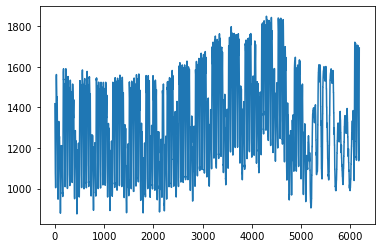

In [62]:
merged1["load"].plot()


<AxesSubplot:>

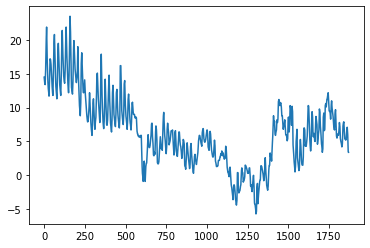

In [63]:
df2["temp_c"].plot()

<AxesSubplot:>

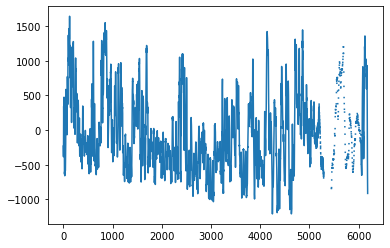

In [64]:
merged1["balance_renew"].plot()


<AxesSubplot:>

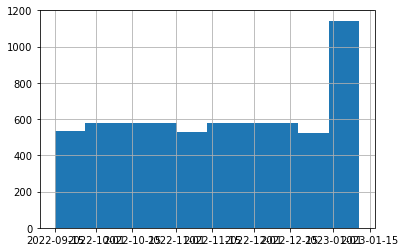

In [65]:
merged1['date']=pd.DatetimeIndex(merged1['timestamp2'],dayfirst=True).date
merged1['date'].hist()


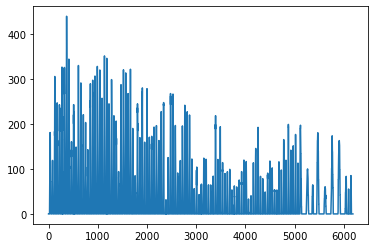

In [66]:
import matplotlib.pyplot as plt
p = plt.plot(merged1['pv']) 

# daily summaries

<AxesSubplot:xlabel='date'>

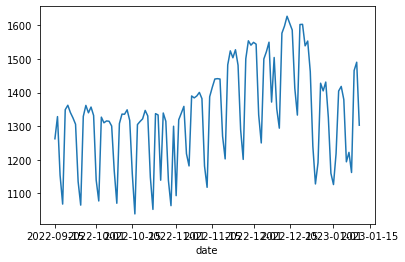

In [67]:
merged1.groupby(by='date').load.mean().plot()

<AxesSubplot:xlabel='date'>

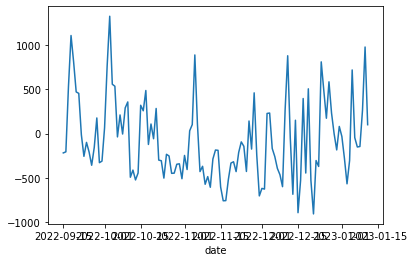

In [68]:
merged1.groupby(by='date').balance_renew.mean().plot()

when it's positive, it means more electricity is produced by renewables 

## bringing in OWN DATA (from Wiener netze)

In [69]:
ownData = pd.read_csv('data/tageswerte_anz22.csv',sep=";",decimal=",") 


In [70]:
ownData.date= pd.to_datetime(ownData['date'],format="%d.%m.%y")
ownData.set_index('date',inplace=True)

In [71]:
ownData

,consumption,notes,not-home,cleaning
date,,,,
2022-01-05,20.846,NaN,NaN,NaN
2022-01-06,30.658,NaN,NaN,NaN
2022-01-07,34.276,NaN,NaN,NaN
2022-01-08,45.018,NaN,NaN,NaN
2022-01-09,33.424,NaN,NaN,NaN
...,...,...,...,...
2022-12-27,NaN,NaN,NaN,NaN
2022-12-28,NaN,NaN,NaN,NaN
2022-12-29,NaN,NaN,NaN,NaN


In [72]:
x= merged1.groupby(by='date').load.mean().to_frame()

In [73]:
DataCombi=pd.merge (ownData,x, left_index=True, right_index=True, how = 'outer')

In [74]:
y= merged1.groupby(by='date').temp_c.mean().to_frame()

In [75]:
DataCombi=pd.merge (DataCombi,y, left_index=True, right_index=True, how = 'outer')

In [76]:
DataCombi['HDD']=18-DataCombi.temp_c # heating degree days are the difference to 18°C temperature (US definition - AT definition = 20/12) 

In [77]:
DataCombi['weekday']=DataCombi.index.weekday

In [78]:
DataCombi.dtypes

consumption    float64
notes           object
not-home        object
cleaning        object
load           float64
temp_c         float64
HDD            float64
weekday          int64
dtype: object

<AxesSubplot:xlabel='date'>

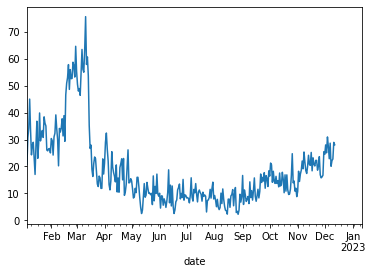

In [79]:
DataCombi.consumption.plot()

<AxesSubplot:xlabel='date'>

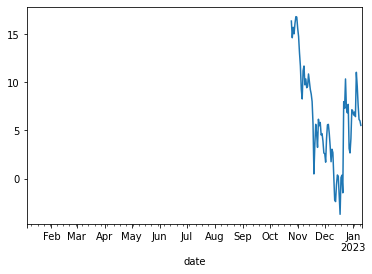

In [80]:
DataCombi.temp_c.plot()

### Does my daily consumption correlate with general consumption in Lower Austria?

<AxesSubplot:xlabel='consumption', ylabel='load'>

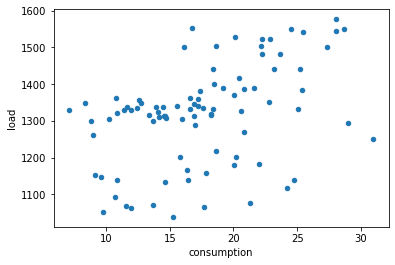

In [81]:
DataCombi.plot.scatter(x='consumption', y='load')

### Does my daily consumption correlate with Heating degree Days?

<AxesSubplot:xlabel='consumption', ylabel='HDD'>

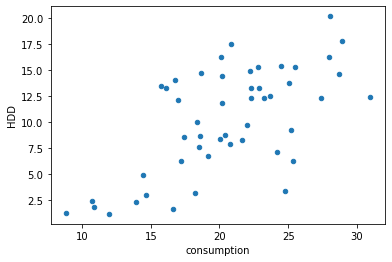

In [82]:
DataCombi.plot.scatter(x='consumption', y='HDD')


In [83]:
import numpy as np
from sklearn.linear_model import LinearRegression

#excluding null values ahead
x= np.array(DataCombi.consumption[(DataCombi.consumption.isnull()==False )& (DataCombi.HDD.isnull()==False )]).reshape((-1, 1))
y= np.array(DataCombi.HDD[(DataCombi.consumption.isnull()==False )& (DataCombi.HDD.isnull()==False )])
#print(x)
#print(y)


In [84]:
LinearRegressionmodel = LinearRegression().fit(x,y)

r_sq = LinearRegressionmodel.score(x,y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {LinearRegressionmodel.intercept_}")
print(f"slope: {LinearRegressionmodel.coef_}")


coefficient of determination: 0.4143096104829216
intercept: -3.011038246699906
slope: [0.6430244]


In [85]:
#DataCombi.plot.scatter(x='consumption', y='HDD')
#plt.plot(LinearRegressionmodel.intercept_, LinearRegressionmodel.coef_)

Approx. Result: with every HDD the consumption increases by 0.64KWh. 18 HDD (0 degree celsius) mean 11.52 kWH for Heating.

### Does load in Lower Austria correlate with Heating degree Days?

<AxesSubplot:xlabel='load', ylabel='HDD'>

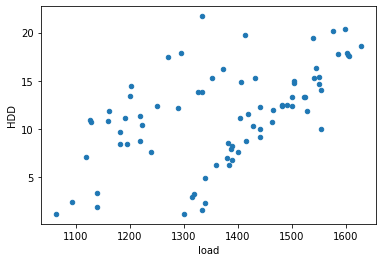

In [86]:
DataCombi.plot.scatter(x='load', y='HDD')

<AxesSubplot:xlabel='load', ylabel='HDD'>

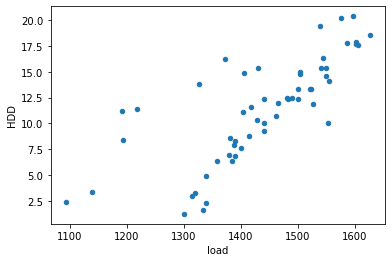

In [87]:
#excluding Sat/sun
DataCombi[DataCombi.weekday<5].plot.scatter(x='load', y='HDD')

In [88]:
DataCombi

,consumption,notes,not-home,cleaning,load,temp_c,HDD,weekday
date,,,,,,,,
2022-01-05,20.846,NaN,NaN,NaN,NaN,NaN,NaN,2
2022-01-06,30.658,NaN,NaN,NaN,NaN,NaN,NaN,3
2022-01-07,34.276,NaN,NaN,NaN,NaN,NaN,NaN,4
2022-01-08,45.018,NaN,NaN,NaN,NaN,NaN,NaN,5
2022-01-09,33.424,NaN,NaN,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...
2023-01-07,NaN,NaN,NaN,NaN,1221.956875,7.616667,10.383333,5
2023-01-08,NaN,NaN,NaN,NaN,1161.997500,6.148000,11.852000,6
2023-01-09,NaN,NaN,NaN,NaN,1465.635625,6.004167,11.995833,0


## Testing a proxy indicator for eco-friendliness of the electricity provided? 

Is it enough to look out at the window and observe the wind (as top indicator found) or do you need to look at websites like https://energiewetter.energiebewegung.at/index.php


<AxesSubplot:xlabel='wind_kph', ylabel='wind'>

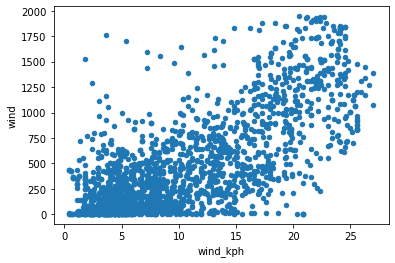

In [89]:
merged1.plot.scatter(x='wind_kph', y='wind')



<AxesSubplot:>

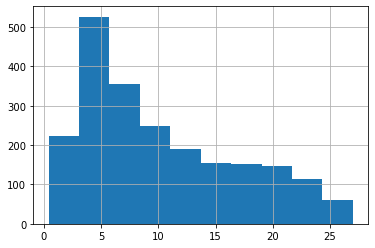

In [90]:
merged1.wind_kph.hist()

<AxesSubplot:>

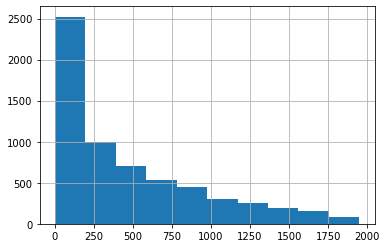

In [91]:
merged1.wind.hist()

In [92]:
sum(merged1.wind>100)


4367

In [93]:
sum(merged1.wind>0)

6184

In [94]:
from statistics import mean
mean(merged1.wind[merged1.wind>100])

642.4865857568125

In [95]:
merged1.groupby(by=pd.cut(merged1.balance_renew,10)).wind_kph.mean()

balance_renew
(-1211.78, -923.881]     6.218841
(-923.881, -638.833]     7.380400
(-638.833, -353.784]     7.925105
(-353.784, -68.735]      8.306190
(-68.735, 216.314]      10.667826
(216.314, 501.362]      14.482955
(501.362, 786.411]      18.212745
(786.411, 1071.46]      19.807447
(1071.46, 1356.509]     21.484211
(1356.509, 1641.557]    20.385714
Name: wind_kph, dtype: float64

In [96]:
merged1.groupby(by=pd.cut(merged1.wind_kph,10)).balance_renew.mean()

wind_kph
(0.373, 3.06]    -325.240704
(3.06, 5.72]     -384.689605
(5.72, 8.38]     -341.510204
(8.38, 11.04]    -271.019684
(11.04, 13.7]    -138.428581
(13.7, 16.36]    -205.116044
(16.36, 19.02]    123.803922
(19.02, 21.68]    357.351859
(21.68, 24.34]    715.144827
(24.34, 27.0]     578.311383
Name: balance_renew, dtype: float64

In [97]:
merged1["eco"]=merged1.balance_renew>0

In [98]:
merged1.groupby(by=pd.cut(merged1.wind_kph,10)).eco.mean()

wind_kph
(0.373, 3.06]     0.120536
(3.06, 5.72]      0.155894
(5.72, 8.38]      0.168539
(8.38, 11.04]     0.225806
(11.04, 13.7]     0.356021
(13.7, 16.36]     0.277419
(16.36, 19.02]    0.578947
(19.02, 21.68]    0.691781
(21.68, 24.34]    0.867257
(24.34, 27.0]     0.836066
Name: eco, dtype: float64

_Result:_ you can see that when the wind is stronger than 15 kph in Vienna, it's getting more and more likely that wind power kicks in and provides green electricity. With no wind in Vienna, it's almost impossible that the power mix is green.

So the proxy "does the wind blow" is stronger than just looking at the hour of the day or the day of the week. 

### compare this to other variables

In [219]:
merged1['hour_of_the_day']=pd.DatetimeIndex(merged1['timestamp2']).hour
merged1['day_of_the_week']=pd.DatetimeIndex(merged1['timestamp2']).weekday

merged1.groupby(by=merged1.hour_of_the_day).eco.mean()

hour_of_the_day
0.0     0.495902
1.0     0.536885
2.0     0.540984
3.0     0.532787
4.0     0.508197
5.0     0.430328
6.0     0.331967
7.0     0.282787
8.0     0.245902
9.0     0.241803
10.0    0.250000
11.0    0.282787
12.0    0.300813
13.0    0.326446
14.0    0.305785
15.0    0.297521
16.0    0.271605
17.0    0.237705
18.0    0.260331
19.0    0.293388
20.0    0.323770
21.0    0.368852
22.0    0.364754
23.0    0.418033
Name: eco, dtype: float64

In [220]:
merged1.groupby(by=merged1.day_of_the_week).eco.mean()

day_of_the_week
0.0    0.473380
1.0    0.349351
2.0    0.354214
3.0    0.283186
4.0    0.183594
5.0    0.455208
6.0    0.328431
Name: eco, dtype: float64

In [221]:
merged1.groupby(by=pd.cut(merged1.pv,10)).eco.mean()

pv
(-0.439, 43.9]        0.369418
(43.9, 87.799]        0.277264
(87.799, 131.699]     0.305714
(131.699, 175.599]    0.232932
(175.599, 219.498]    0.253886
(219.498, 263.398]    0.459016
(263.398, 307.298]    0.561644
(307.298, 351.198]    0.514286
(351.198, 395.097]    0.000000
(395.097, 438.997]    0.000000
Name: eco, dtype: float64

<AxesSubplot:>

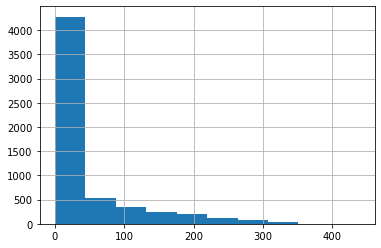

In [222]:
merged1.pv.hist()

In [227]:
merged1.groupby(by=pd.cut(merged1.temp_c,10)).eco.mean()

temp_c
(-5.729, -2.78]    0.081081
(-2.78, 0.14]      0.460993
(0.14, 3.06]       0.331230
(3.06, 5.98]       0.339492
(5.98, 8.9]        0.281319
(8.9, 11.82]       0.320946
(11.82, 14.74]     0.133333
(14.74, 17.66]     0.100000
(17.66, 20.58]     0.041667
(20.58, 23.5]      0.000000
Name: eco, dtype: float64

# ML model

*Method:* executed in Databricks using AutoML function, using hourly load and weather data (data set "merged1"). 

*Basic learning:* The eco-friendliness of power consumption at a certain hour is mostly dominated by availablity of wind power production. Hydro (with lower variability), PV (with lower availability in the examined winter months), deamnd side effects (hour of the day, weekday) of less importance. 

### stop here: moved to new notebook for data preparation for DataBricks AutoML

In [15]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
import shap
shap.initjs()
plot_cmap = ["#0E5587","#9C755F"]
import matplotlib.pyplot as plt
from matplotlib import colors as plt_colors
import seaborn as sns
    

In [16]:
merged1['timestamp2']=merged1['timestamp2'].astype("datetime64")

In [17]:


merged1['hour_of_the_day']=pd.DatetimeIndex(merged1['timestamp2']).hour
merged1['day_of_the_week']=pd.DatetimeIndex(merged1['timestamp2']).weekday

In [18]:
merged1

,timestamp,hydro,biomass,wind,pv,load,timestamp2,balance_renew,time_epoch,time,...,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,hour_of_the_day,day_of_the_week
0,1663264800,665,66.1558,456.28,0.0000,1417.80,2022-09-15 20:00:00,-230.3642,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,3
1,1663266600,665,66.1558,286.70,0.0000,1371.00,2022-09-15 20:30:00,-353.1442,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,3
2,1663268400,665,66.1558,222.04,0.0000,1314.55,2022-09-15 21:00:00,-361.3542,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,3
3,1663270200,665,66.1558,145.18,0.0000,1260.52,2022-09-15 21:30:00,-384.1842,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,3
4,1663272000,665,66.1558,136.64,0.0000,1249.54,2022-09-15 22:00:00,-381.7442,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4151,1670740200,543,94.4000,1832.44,0.0000,1232.83,2022-11-12 07:30:00,1237.0100,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,5
4152,1670742000,543,94.4000,1838.54,0.0000,1269.96,2022-11-12 08:00:00,1205.9800,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,5
4153,1670743800,540,94.4000,1836.10,3.1062,1310.55,2022-11-12 08:30:00,1163.0562,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,5
4154,1670745600,540,94.4000,1848.30,18.6465,1345.77,2022-11-12 09:00:00,1155.5765,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,5


In [19]:

y = (merged1["balance_renew"] > 0).astype(int)

X = merged1[["temp_c","is_day","hour_of_the_day","day_of_the_week","hydro","wind","pv"]]
X_trn, X_val, y_trn, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
ds_trn = lgb.Dataset(X_trn, label=y_trn, categorical_feature="is_day", free_raw_data=False)
ds_val = lgb.Dataset(X_val, label=y_val, categorical_feature="is_day", free_raw_data=False)


In [ ]:
cat_cols = [
    'is_day']


model = lgb.train(
    params={'early_stopping_round': 5, 'metric': 'auc', 'verbosity': 1, 'force_col_wise': True, 'objective': 'binary',
            'n_estimators': 10}, #had to add n_estimators to avoid kernel crash
    train_set=ds_trn,
    valid_sets=[ds_val], 
    categorical_feature=cat_cols
)

##### (!) stop here ... the model crashes (kernel dead - did not solve to add n_estimators)


In [1]:
X_shap = X.iloc[:10_000]
y_shap = y.iloc[:10_000]
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_shap)


NameError: name 'X' is not defined

In [ ]:
probs = model.predict(X_shap)
probs_df = pd.concat([pd.Series(probs, name='probability').reset_index(drop=True), pd.Series(y_shap, name='george').reset_index(drop=True)], axis=1)
sns.displot(data=probs_df, x='probability', hue='eco_power', bins=20, palette=list(reversed(plot_cmap)))


In [ ]:
shap.summary_plot(shap_values, X_shap, color=plt_colors.ListedColormap(np.array(plot_cmap)), plot_size=0.3)


source for the model was: https://github.com/ctoegi/syn_customer_code/blob/main/model.ipynb

NameError: name 'X' is not defined